In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv('c:/Users/jadha/Data/age_gender.csv')
df.shape

(23705, 5)

In [4]:
df.head()

,age,race,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.gender.value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [6]:
df.race.value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: race, dtype: int64

In [7]:
df.age.value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

In [8]:
px=np.array(df.pixels[0].split(),dtype='int32').reshape(48,48)

In [9]:
48*48

2304

In [10]:
px.shape

(48, 48)

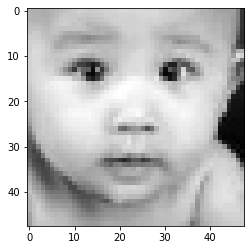

In [11]:
plt.imshow(px,cmap='gray')
plt.show()

In [12]:
df.pixels=df.pixels.apply(lambda x: np.array(x.split(),'int32').reshape(48,48))

In [13]:
df.gender=df.gender.apply(lambda x: 'Male' if x==0 else 'Female' )

In [14]:
race=['White','Black','Ashian','Indian','Other']
df.race=df.race.apply(lambda x: race[x])

In [15]:
df.race.value_counts()

White     10078
Black      4526
Indian     3975
Ashian     3434
Other      1692
Name: race, dtype: int64

In [16]:
df.head()

,age,race,gender,img_name,pixels
0,1,Ashian,Male,20161219203650636.jpg.chip.jpg,"[[129, 128, 128, 126, 127, 130, 133, 135, 139,..."
1,1,Ashian,Male,20161219222752047.jpg.chip.jpg,"[[164, 74, 111, 168, 169, 171, 175, 182, 184, ..."
2,1,Ashian,Male,20161219222832191.jpg.chip.jpg,"[[67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116..."
3,1,Ashian,Male,20161220144911423.jpg.chip.jpg,"[[193, 197, 198, 200, 199, 200, 202, 203, 204,..."
4,1,Ashian,Male,20161220144914327.jpg.chip.jpg,"[[202, 205, 209, 210, 209, 209, 210, 211, 212,..."


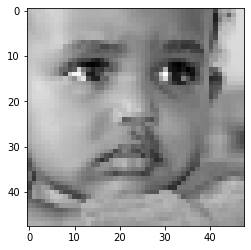

In [17]:
k=np.random.randint(0,23705)
k_df=pd.DataFrame(df.iloc[k])
px=df.pixels[k]
plt.imshow(px,cmap='gray')
# plt.title(k_df[2])
plt.show()

In [18]:
def show_images(rows,cols):
    plt.figure(figsize=[rows*3,cols*3])
    for i in range (1,rows*cols+1):
        plt.subplot(rows,cols,i)
        k=np.random.randint(0,23705)
        px=df.pixels[k]
        plt.imshow(px,cmap='gray')
        plt.title(f"Age:{df.age[k]}  Gender :{df.gender[k]} \n race : {df.race[k]}",color='b')
        plt.axis('off')
    plt.tight_layout()

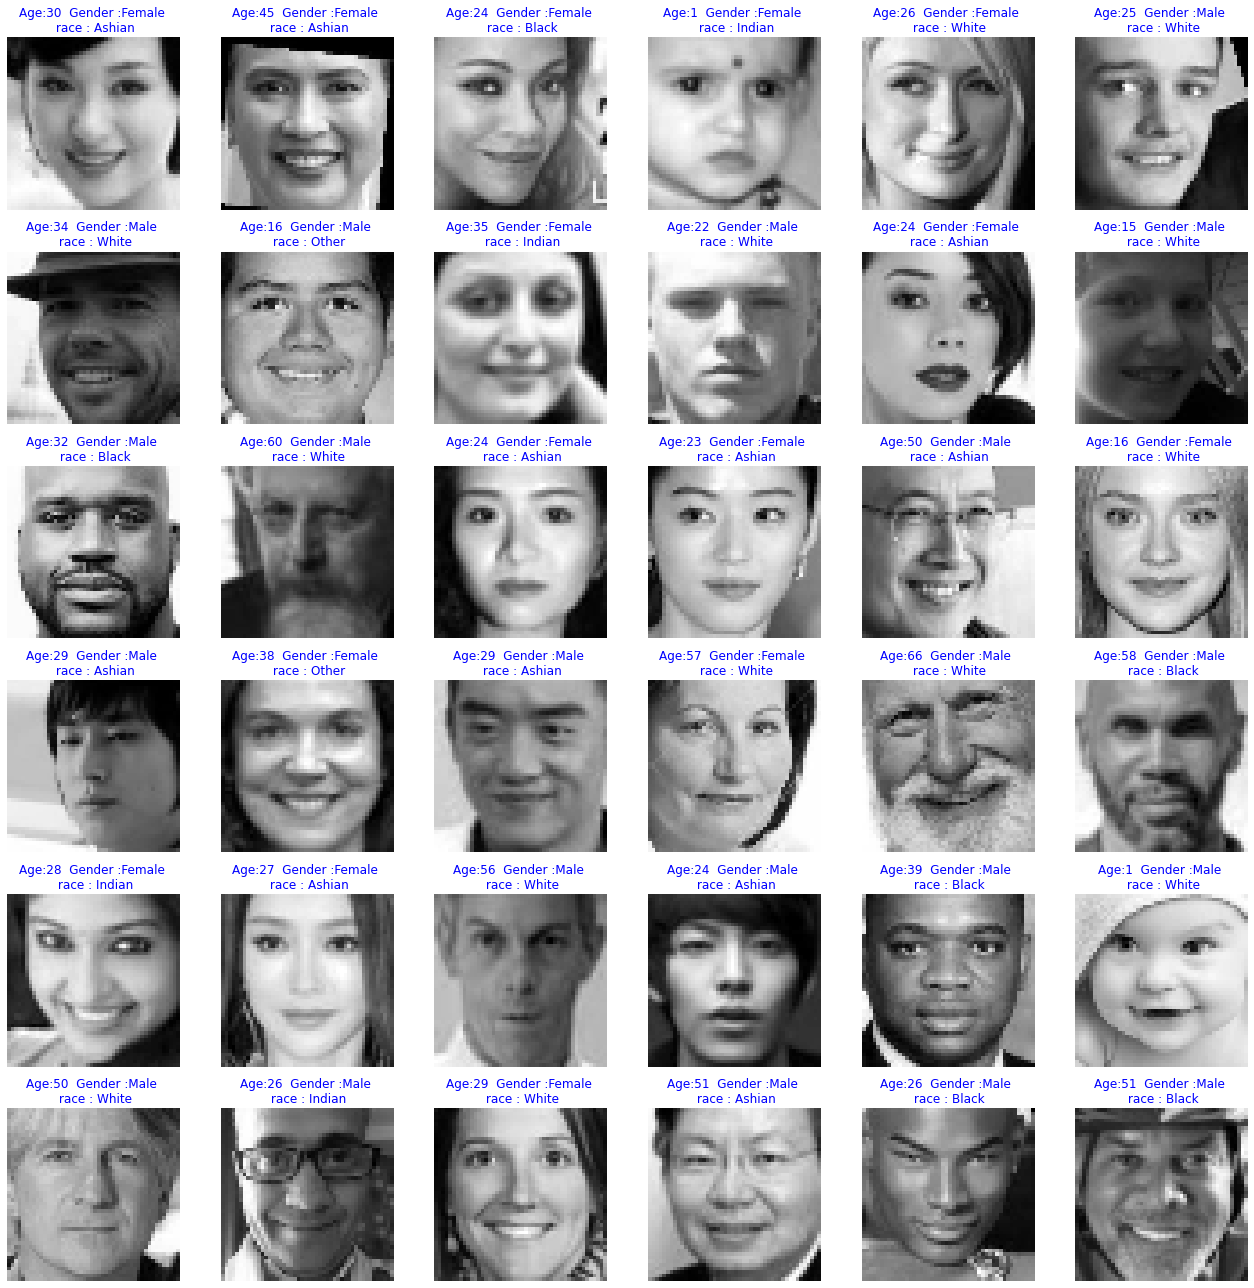

In [19]:
show_images(6,6)

In [20]:
x=np.zeros((23705,48,48))
x[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
for i in range (23705):
    x[i]=df.pixels[i]/255

In [22]:
df.pixels[0]/255

array([[0.50588235, 0.50196078, 0.50196078, ..., 0.4627451 , 0.38823529,
        0.20784314],
       [0.50980392, 0.50588235, 0.50196078, ..., 0.45882353, 0.38431373,
        0.20392157],
       [0.51372549, 0.50588235, 0.50980392, ..., 0.44705882, 0.38039216,
        0.19607843],
       ...,
       [0.4745098 , 0.54117647, 0.57647059, ..., 0.59215686, 0.58823529,
        0.58039216],
       [0.45882353, 0.5372549 , 0.57254902, ..., 0.58431373, 0.58039216,
        0.58039216],
       [0.45098039, 0.52941176, 0.55686275, ..., 0.57254902, 0.57254902,
        0.57254902]])

In [23]:
x[0]

array([[0.50588235, 0.50196078, 0.50196078, ..., 0.4627451 , 0.38823529,
        0.20784314],
       [0.50980392, 0.50588235, 0.50196078, ..., 0.45882353, 0.38431373,
        0.20392157],
       [0.51372549, 0.50588235, 0.50980392, ..., 0.44705882, 0.38039216,
        0.19607843],
       ...,
       [0.4745098 , 0.54117647, 0.57647059, ..., 0.59215686, 0.58823529,
        0.58039216],
       [0.45882353, 0.5372549 , 0.57254902, ..., 0.58431373, 0.58039216,
        0.58039216],
       [0.45098039, 0.52941176, 0.55686275, ..., 0.57254902, 0.57254902,
        0.57254902]])

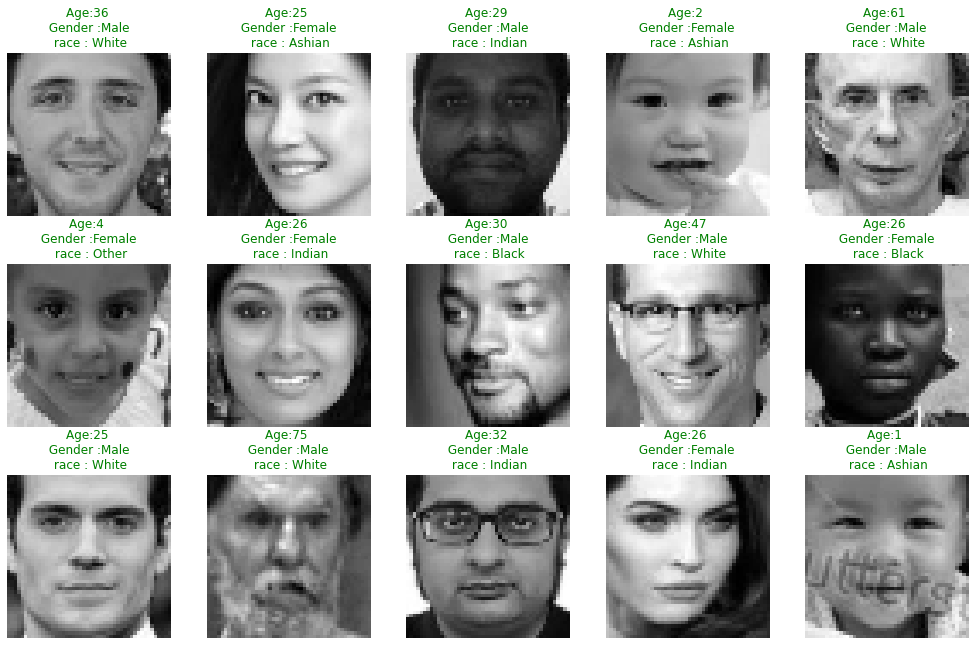

In [24]:
plt.figure(figsize=[14,9])
for i in range (1,16):
    plt.subplot(3,5,i)
    k=np.random.randint(0,23705)
    plt.imshow(x[k],cmap='gray')
    plt.title(f"Age:{df.age[k]} \n Gender :{df.gender[k]} \n race : {df.race[k]}",color='green')
    plt.axis('off')
plt.tight_layout()

In [25]:
x.shape

(23705, 48, 48)

In [26]:
y=df['gender']
y.shape

(23705,)

In [27]:
y=pd.get_dummies(y)
y.shape

(23705, 2)